# Image Classifier
## Dataset : 28x28 pixel Low Res Images

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 7

/Users/rutvikshah/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
CATEGORIES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Getting the Data

In [3]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
print("Train Dataset Dimensions : ",train_images.shape)
print("Test  Dataset Dimensions : ",test_images.shape)

Train Dataset Dimensions :  (60000, 28, 28)
Test  Dataset Dimensions :  (10000, 28, 28)


In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Sample Train Data

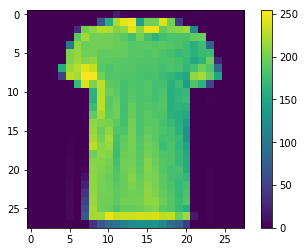

In [7]:
plt.figure()
plt.imshow(train_images[17])
plt.colorbar()
plt.grid(False)

### Sample Test Data

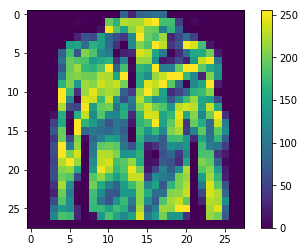

In [8]:
plt.figure()
plt.imshow(test_images[17])
plt.colorbar()
plt.grid(False)

## Preprocessing (Normalisation)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Neural Network
##### Structure of the NNs:

### Model I
• Input Feature (Flattened/Linearised)<br>
• Hidden Dense Layer 1: 128 neurons (AF : RELU)<br>
• Output Layer : 10 neurons (AF : SOFTMAX)<br>


### Model II
• Input Feature (Flattened/Linearised)<br>
• Hidden Dense Layer 1: 128 neurons (AF : RELU)<br>
• Hidden Dense Layer 2: 128 neurons (AF : RELU)<br>
• Output Layer : 10 neurons (AF : SOFTMAX)<br>


### Model III
• Input Feature (Flattened/Linearised)<br>
• Hidden Dense Layer 1: 128 neurons (AF : RELU)<br>
• Hidden Dense Layer 2: 128 neurons (AF : RELU)<br>
• Hidden Dense Layer 3: 128 neurons (AF : RELU)<br>
• Output Layer : 10 neurons (AF : SOFTMAX)<br>

In [10]:
classifier1 = keras.Sequential([
                keras.layers.Flatten(input_shape=(28, 28)),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(10, activation=tf.nn.softmax)
              ])

classifier2 = keras.Sequential([
                keras.layers.Flatten(input_shape=(28, 28)),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(10, activation=tf.nn.softmax)
              ])

classifier3 = keras.Sequential([
                keras.layers.Flatten(input_shape=(28, 28)),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(10, activation=tf.nn.softmax)
              ])

In [11]:
classifier1.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier2.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier3.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training All Classifiers/Models

In [12]:
classifier1.fit(train_images, train_labels, epochs=7)

Epoch 1/7
60000/60000 [==============================] - 6s 108us/step - loss: 0.4932 - acc: 0.8261
Epoch 2/7
60000/60000 [==============================] - 6s 94us/step - loss: 0.3721 - acc: 0.8666
Epoch 3/7
60000/60000 [==============================] - 6s 94us/step - loss: 0.3353 - acc: 0.8778
Epoch 4/7
60000/60000 [==============================] - 6s 95us/step - loss: 0.3121 - acc: 0.8855
Epoch 5/7
60000/60000 [==============================] - 6s 97us/step - loss: 0.2926 - acc: 0.8920
Epoch 6/7
60000/60000 [==============================] - 6s 97us/step - loss: 0.2795 - acc: 0.8961
Epoch 7/7
60000/60000 [==============================] - 6s 97us/step - loss: 0.2659 - acc: 0.9013


In [13]:
classifier2.fit(train_images, train_labels, epochs=7)

Epoch 1/7
60000/60000 [==============================] - 7s 123us/step - loss: 0.4839 - acc: 0.8272
Epoch 2/7
60000/60000 [==============================] - 7s 116us/step - loss: 0.3622 - acc: 0.8681
Epoch 3/7
60000/60000 [==============================] - 7s 116us/step - loss: 0.3292 - acc: 0.8776
Epoch 4/7
60000/60000 [==============================] - 7s 116us/step - loss: 0.3029 - acc: 0.8886
Epoch 5/7
60000/60000 [==============================] - 7s 117us/step - loss: 0.2867 - acc: 0.8928
Epoch 6/7
60000/60000 [==============================] - 7s 116us/step - loss: 0.2723 - acc: 0.8991
Epoch 7/7
60000/60000 [==============================] - 7s 115us/step - loss: 0.2585 - acc: 0.9032


In [14]:
classifier3.fit(train_images, train_labels, epochs=7)

Epoch 1/7
60000/60000 [==============================] - 8s 137us/step - loss: 0.4870 - acc: 0.8237
Epoch 2/7
60000/60000 [==============================] - 8s 129us/step - loss: 0.3661 - acc: 0.8654
Epoch 3/7
60000/60000 [==============================] - 8s 129us/step - loss: 0.3311 - acc: 0.8779
Epoch 4/7
60000/60000 [==============================] - 8s 129us/step - loss: 0.3067 - acc: 0.8858
Epoch 5/7
60000/60000 [==============================] - 8s 131us/step - loss: 0.2909 - acc: 0.8921
Epoch 6/7
60000/60000 [==============================] - 8s 130us/step - loss: 0.2769 - acc: 0.8969
Epoch 7/7
60000/60000 [==============================] - 8s 129us/step - loss: 0.2640 - acc: 0.8999


## Finding Accuracy Of Each Classifier On Test Set

In [15]:
test_loss, test_acc = classifier1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8766


In [16]:
test_loss, test_acc = classifier2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 51us/step
Test accuracy: 0.88


In [17]:
test_loss, test_acc = classifier3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 52us/step
Test accuracy: 0.8739


In [18]:
class1_predict = classifier1.predict(test_images)
class2_predict = classifier2.predict(test_images)
class3_predict = classifier3.predict(test_images)

In [19]:
def plot_image(i, arr, actual_label, img):
    arr, actual_label, img = arr[i], actual_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(arr)
    if predicted_label == actual_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(arr),
                                CATEGORIES[actual_label]),
                                color=color)

def plot_value_array(i, arr, actual_label):
    arr, actual_label = arr[i], actual_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), arr, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(arr)

    thisplot[predicted_label].set_color('red')
    thisplot[actual_label].set_color('blue')

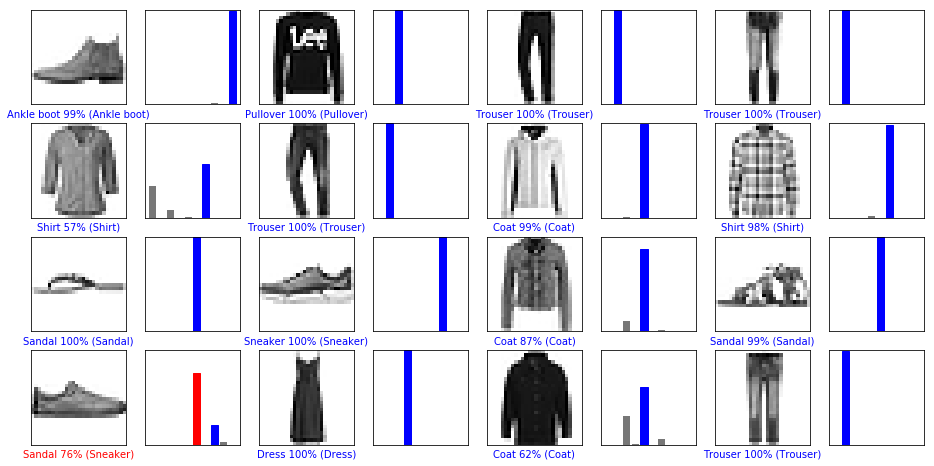

In [20]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, class1_predict, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, class1_predict, test_labels)

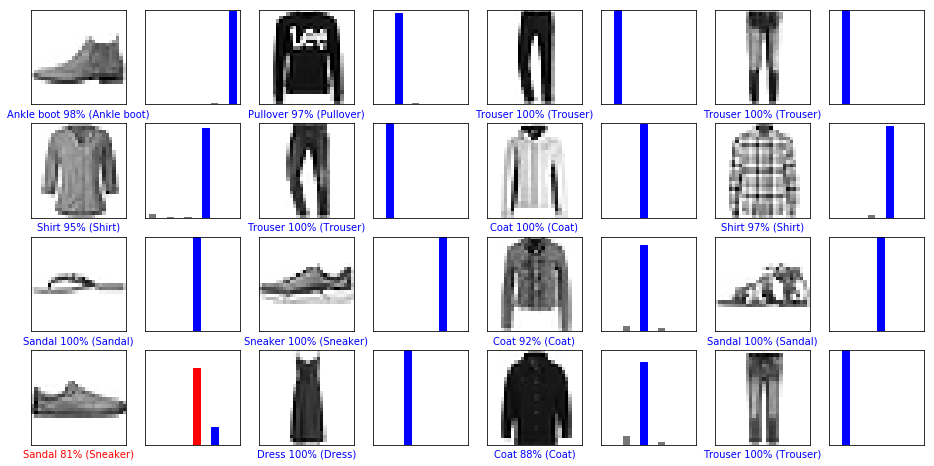

In [21]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, class3_predict, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, class3_predict, test_labels)

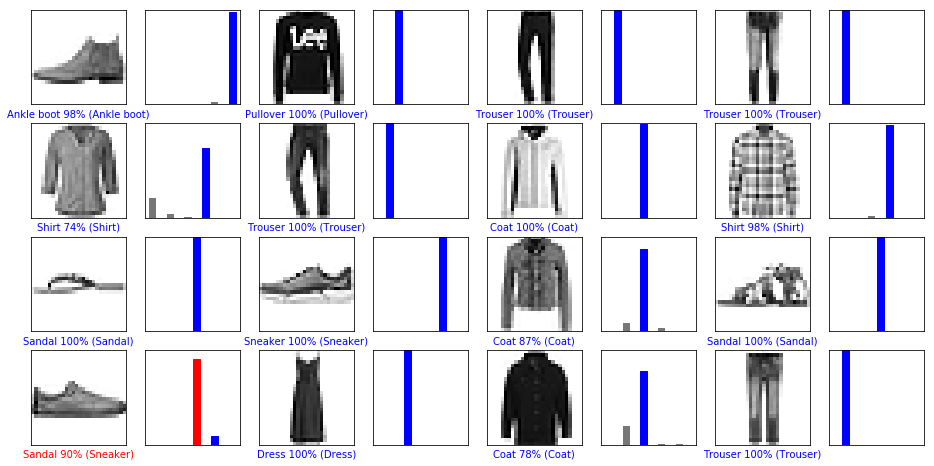

In [22]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, class2_predict, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, class2_predict, test_labels)